In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots

# Science plot package + Dracula theme
plt.style.use(['science', 'dark_background'])
plt.rcParams['axes.facecolor'] = '#282a36'
plt.rcParams['figure.facecolor'] = '#282a36'
colorcycle = ['#8be9fd', '#ff79c6', '#50fa7b', '#bd93f9', '#ffb86c', '#ff5555', '#f1fa8c', 
'#6272a4']
plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=colorcycle)
white = '#f8f8f2' # foreground

# change dpi
plt.rcParams['figure.dpi'] = 1024

Number of ways to get a sum of 100 with 100 dice: 1
Number of ways to get a sum of 101 with 100 dice: 100
Number of ways to get a sum of 102 with 100 dice: 5050
Number of ways to get a sum of 350 with 100 dice: 1.52e+76


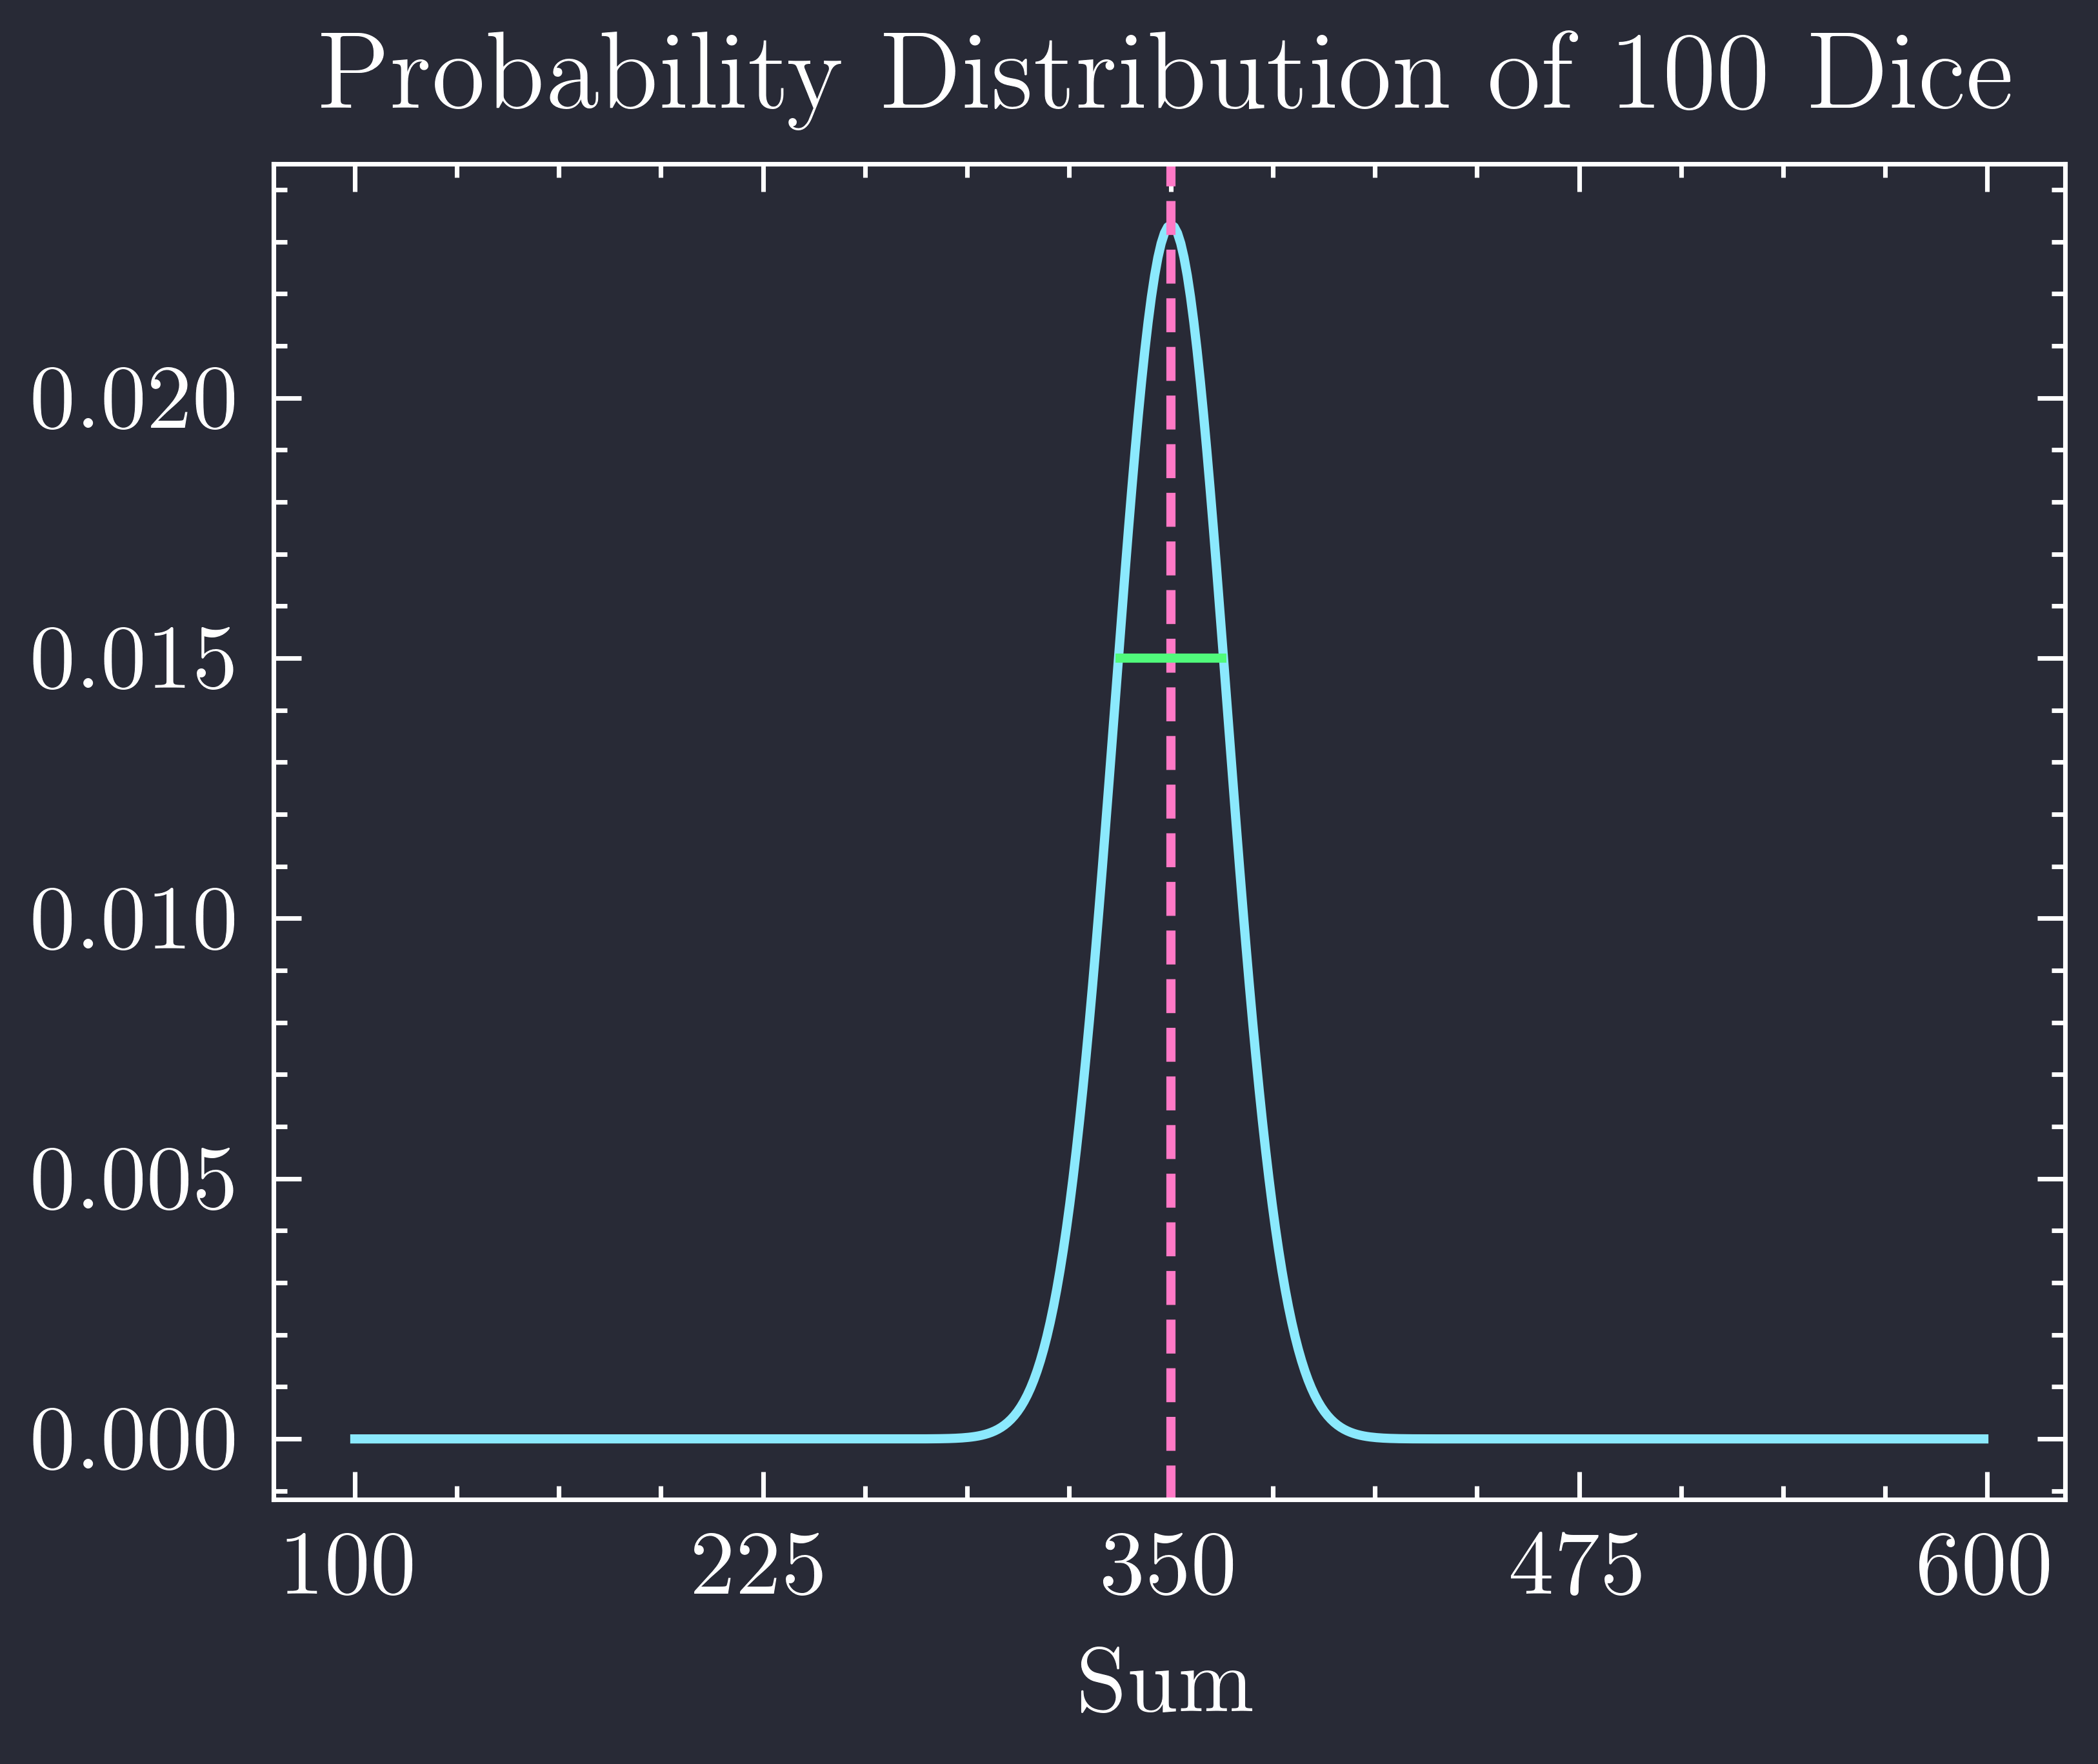

Probability of getting a sum of 350 with 100 dice: 2.33e-02
Probability distribution adds to 1: 1.00e+00


In [17]:
# highly optimized function to count the number of ways to get a sum of s with d dice
def count_ways_to_sum(sum_target, num_dice):
    # Initialize a 2D array to store results of subproblems
    dp = [[0] * (sum_target + 1) for _ in range(num_dice + 1)]

    # Base case: there is one way to get a sum of 0 (no dice)
    dp[0][0] = 1

    # Fill the dp table using the convolution formula
    for d in range(1, num_dice + 1):
        for s in range(1, sum_target + 1):
            for k in range(1, 7):
                if s - k >= 0:
                    dp[d][s] += dp[d-1][s-k]

    return dp[num_dice][sum_target]

# Example usage:
sum_100_ways = count_ways_to_sum(100, 100)
sum_101_ways = count_ways_to_sum(101, 100)
sum_102_ways = count_ways_to_sum(102, 100)
sum_350_ways = count_ways_to_sum(350, 100)

print(f"Number of ways to get a sum of 100 with 100 dice: {sum_100_ways}")
print(f"Number of ways to get a sum of 101 with 100 dice: {sum_101_ways}")
print(f"Number of ways to get a sum of 102 with 100 dice: {sum_102_ways}")
print(f"Number of ways to get a sum of 350 with 100 dice: {sum_350_ways:.2e}")

# for loop to get a function of sum to combinations
sums = np.arange(100, 600, 1)
ways = []
for i in sums:
    ways.append(count_ways_to_sum(i, 100) / 6**100)

# plotting
plt.figure()
plt.plot(sums, ways)
plt.xlabel('Sum')
plt.title('Probability Distribution of 100 Dice')

# Add x-axis label at 350 as "mean"
plt.axvline(x=350, color=colorcycle[1], linestyle='--')

# Add tick label at 500/4 intervals
plt.xticks(np.arange(100, 601, 125))

# Add standard deviation at x= 350 +/- 17 as horizontal line
plt.hlines(y=0.015, xmin=350-17, xmax=350+17, color=colorcycle[2])

plt.show()

print (f"Probability of getting a sum of 350 with 100 dice: {sum_350_ways / 6**100:.2e}")
# sum up ways
print (f"Probability distribution adds to 1: {sum(ways):.2e}")

100.0


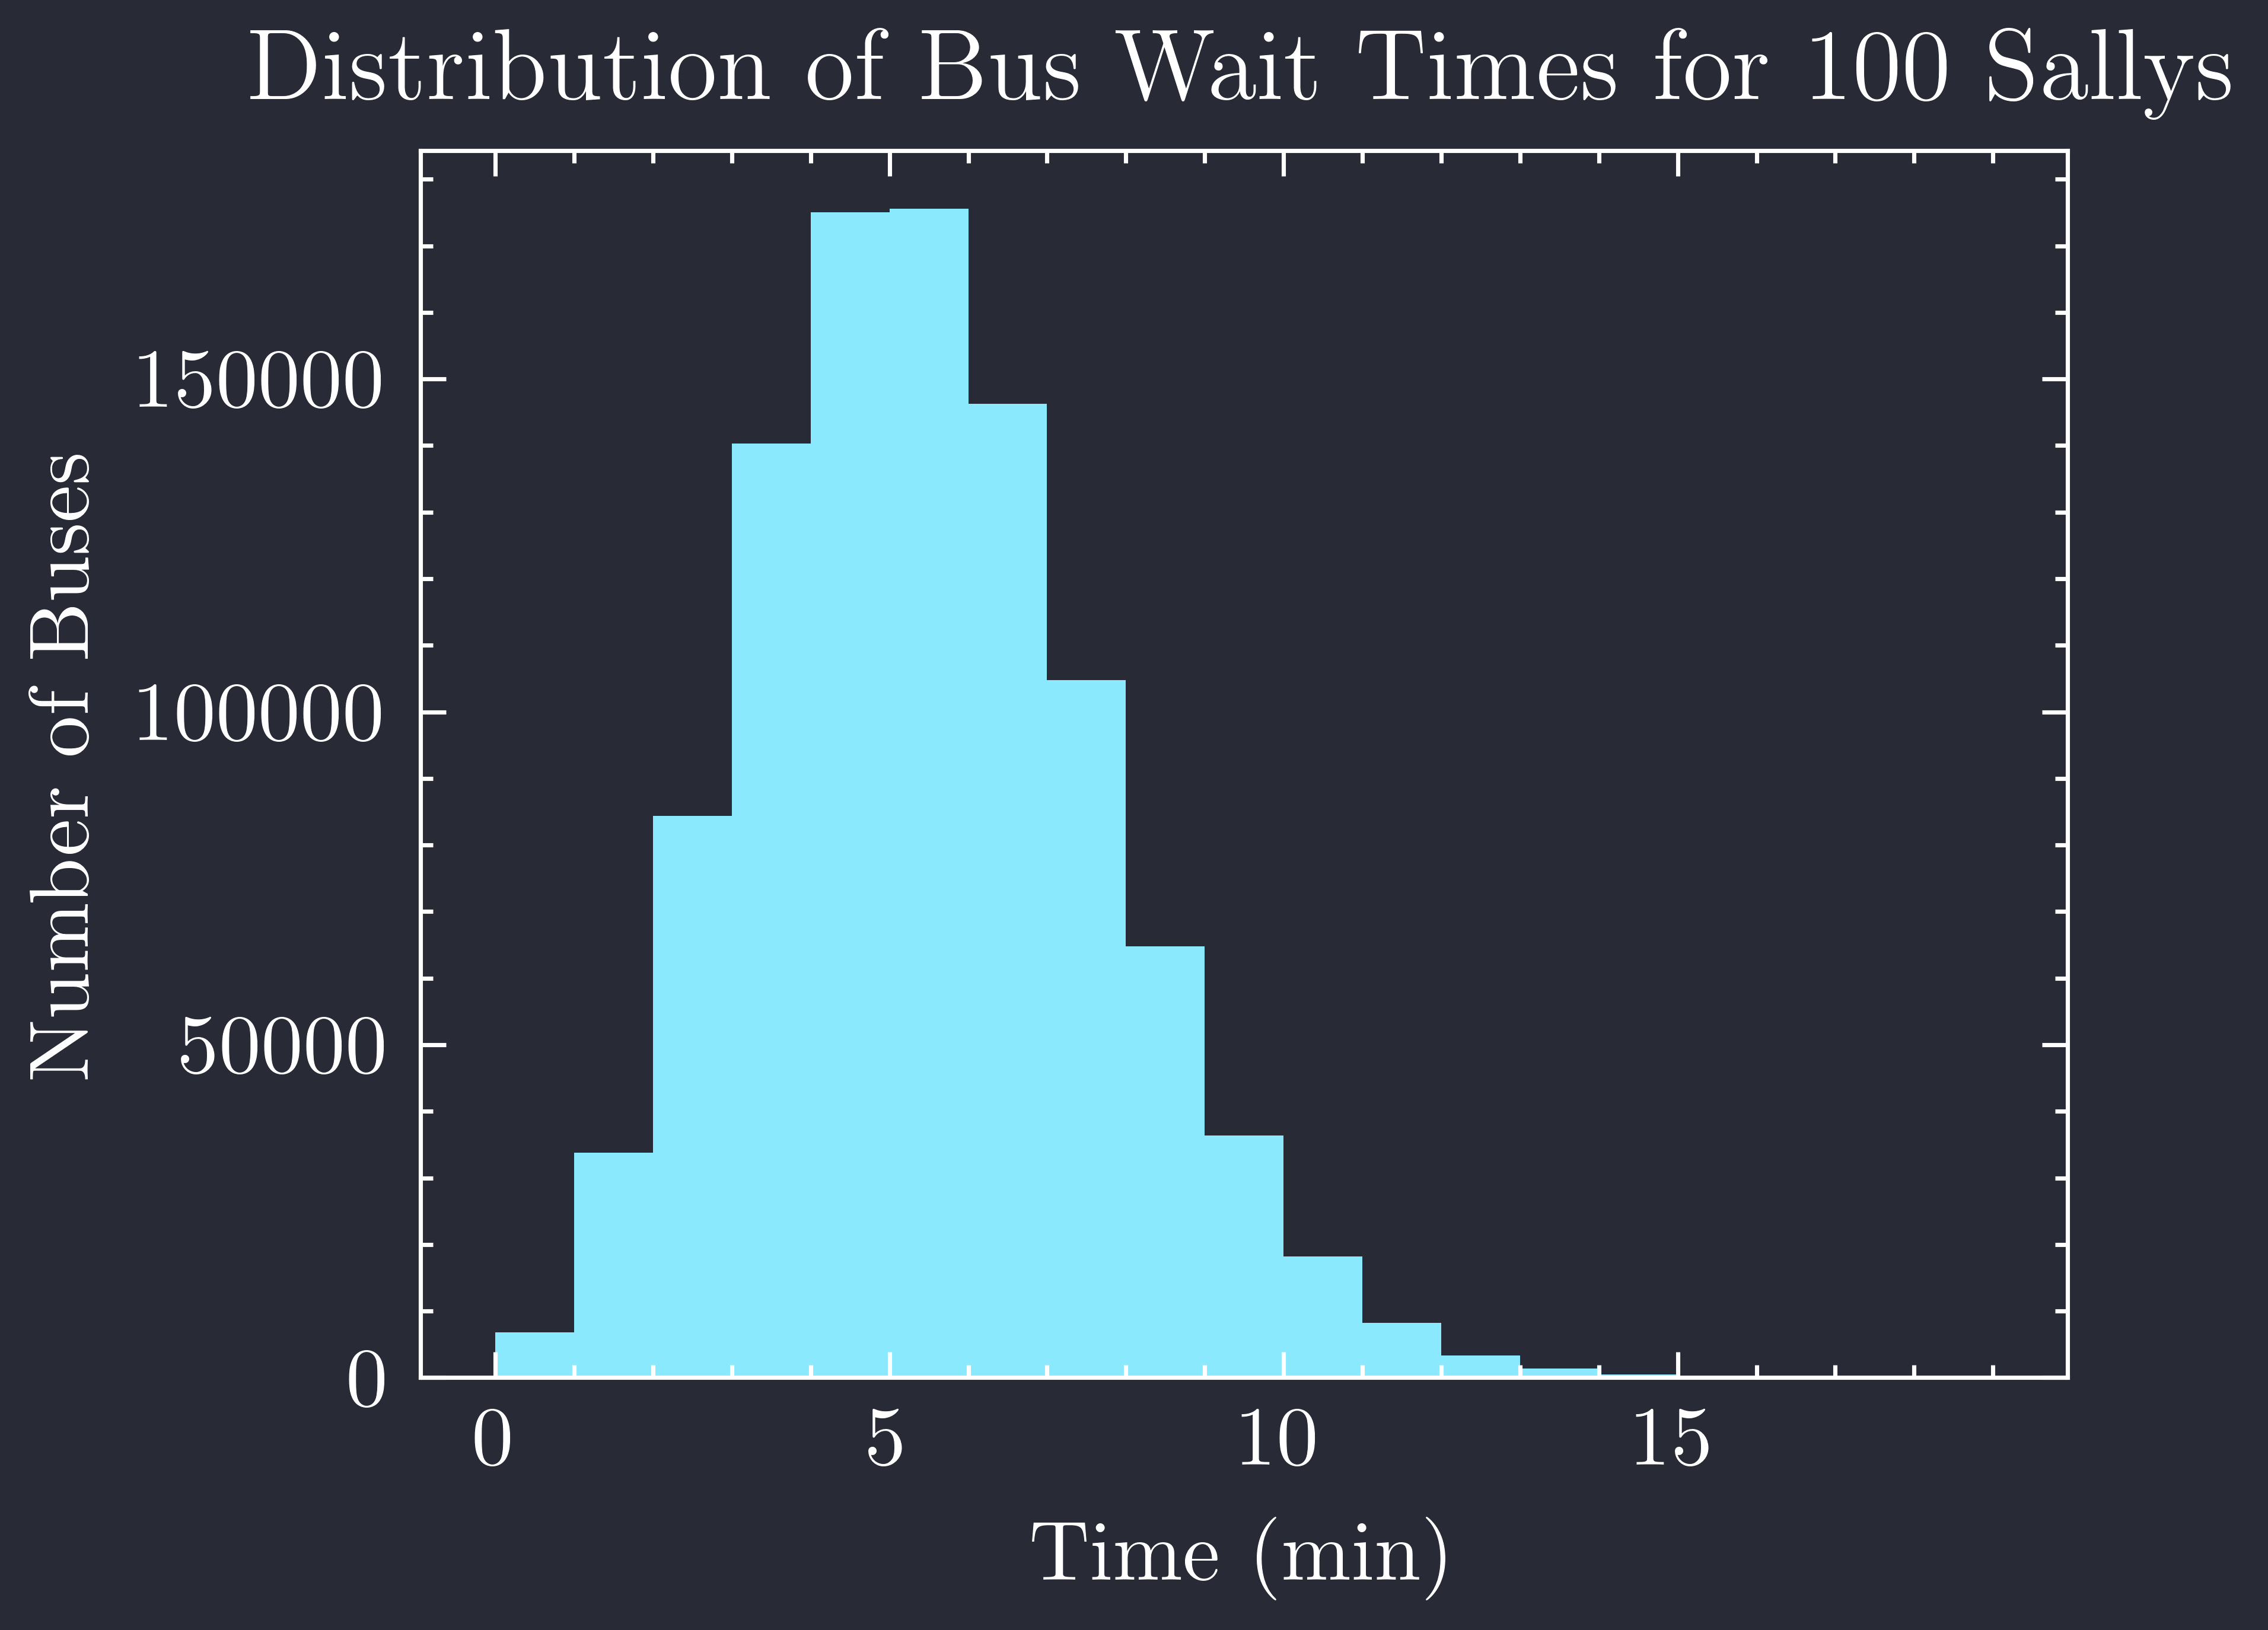

In [30]:
# 481 Problem 8d
# Simulation of 10000 buses and 100 Sally's

# constants
N = 10000 # number of buses
t_avg = 5 # average time between buses

# using poisson distribution old way
t_poisson = np.random.poisson(t_avg, N)

# simulating 100 Sally's 
for i in range(99):
    t_poisson = np.concatenate((t_poisson, np.random.poisson(t_avg, N)))

# checking if it is 100 Sally's 
print(len(t_poisson) / 10000)

# plotting
plt.figure()
plt.hist(t_poisson, bins=np.max(t_poisson))
plt.xlabel('Time (min)')
plt.ylabel('Number of Buses')
plt.title('Distribution of Bus Wait Times for 100 Sallys')
plt.show()

5.001477


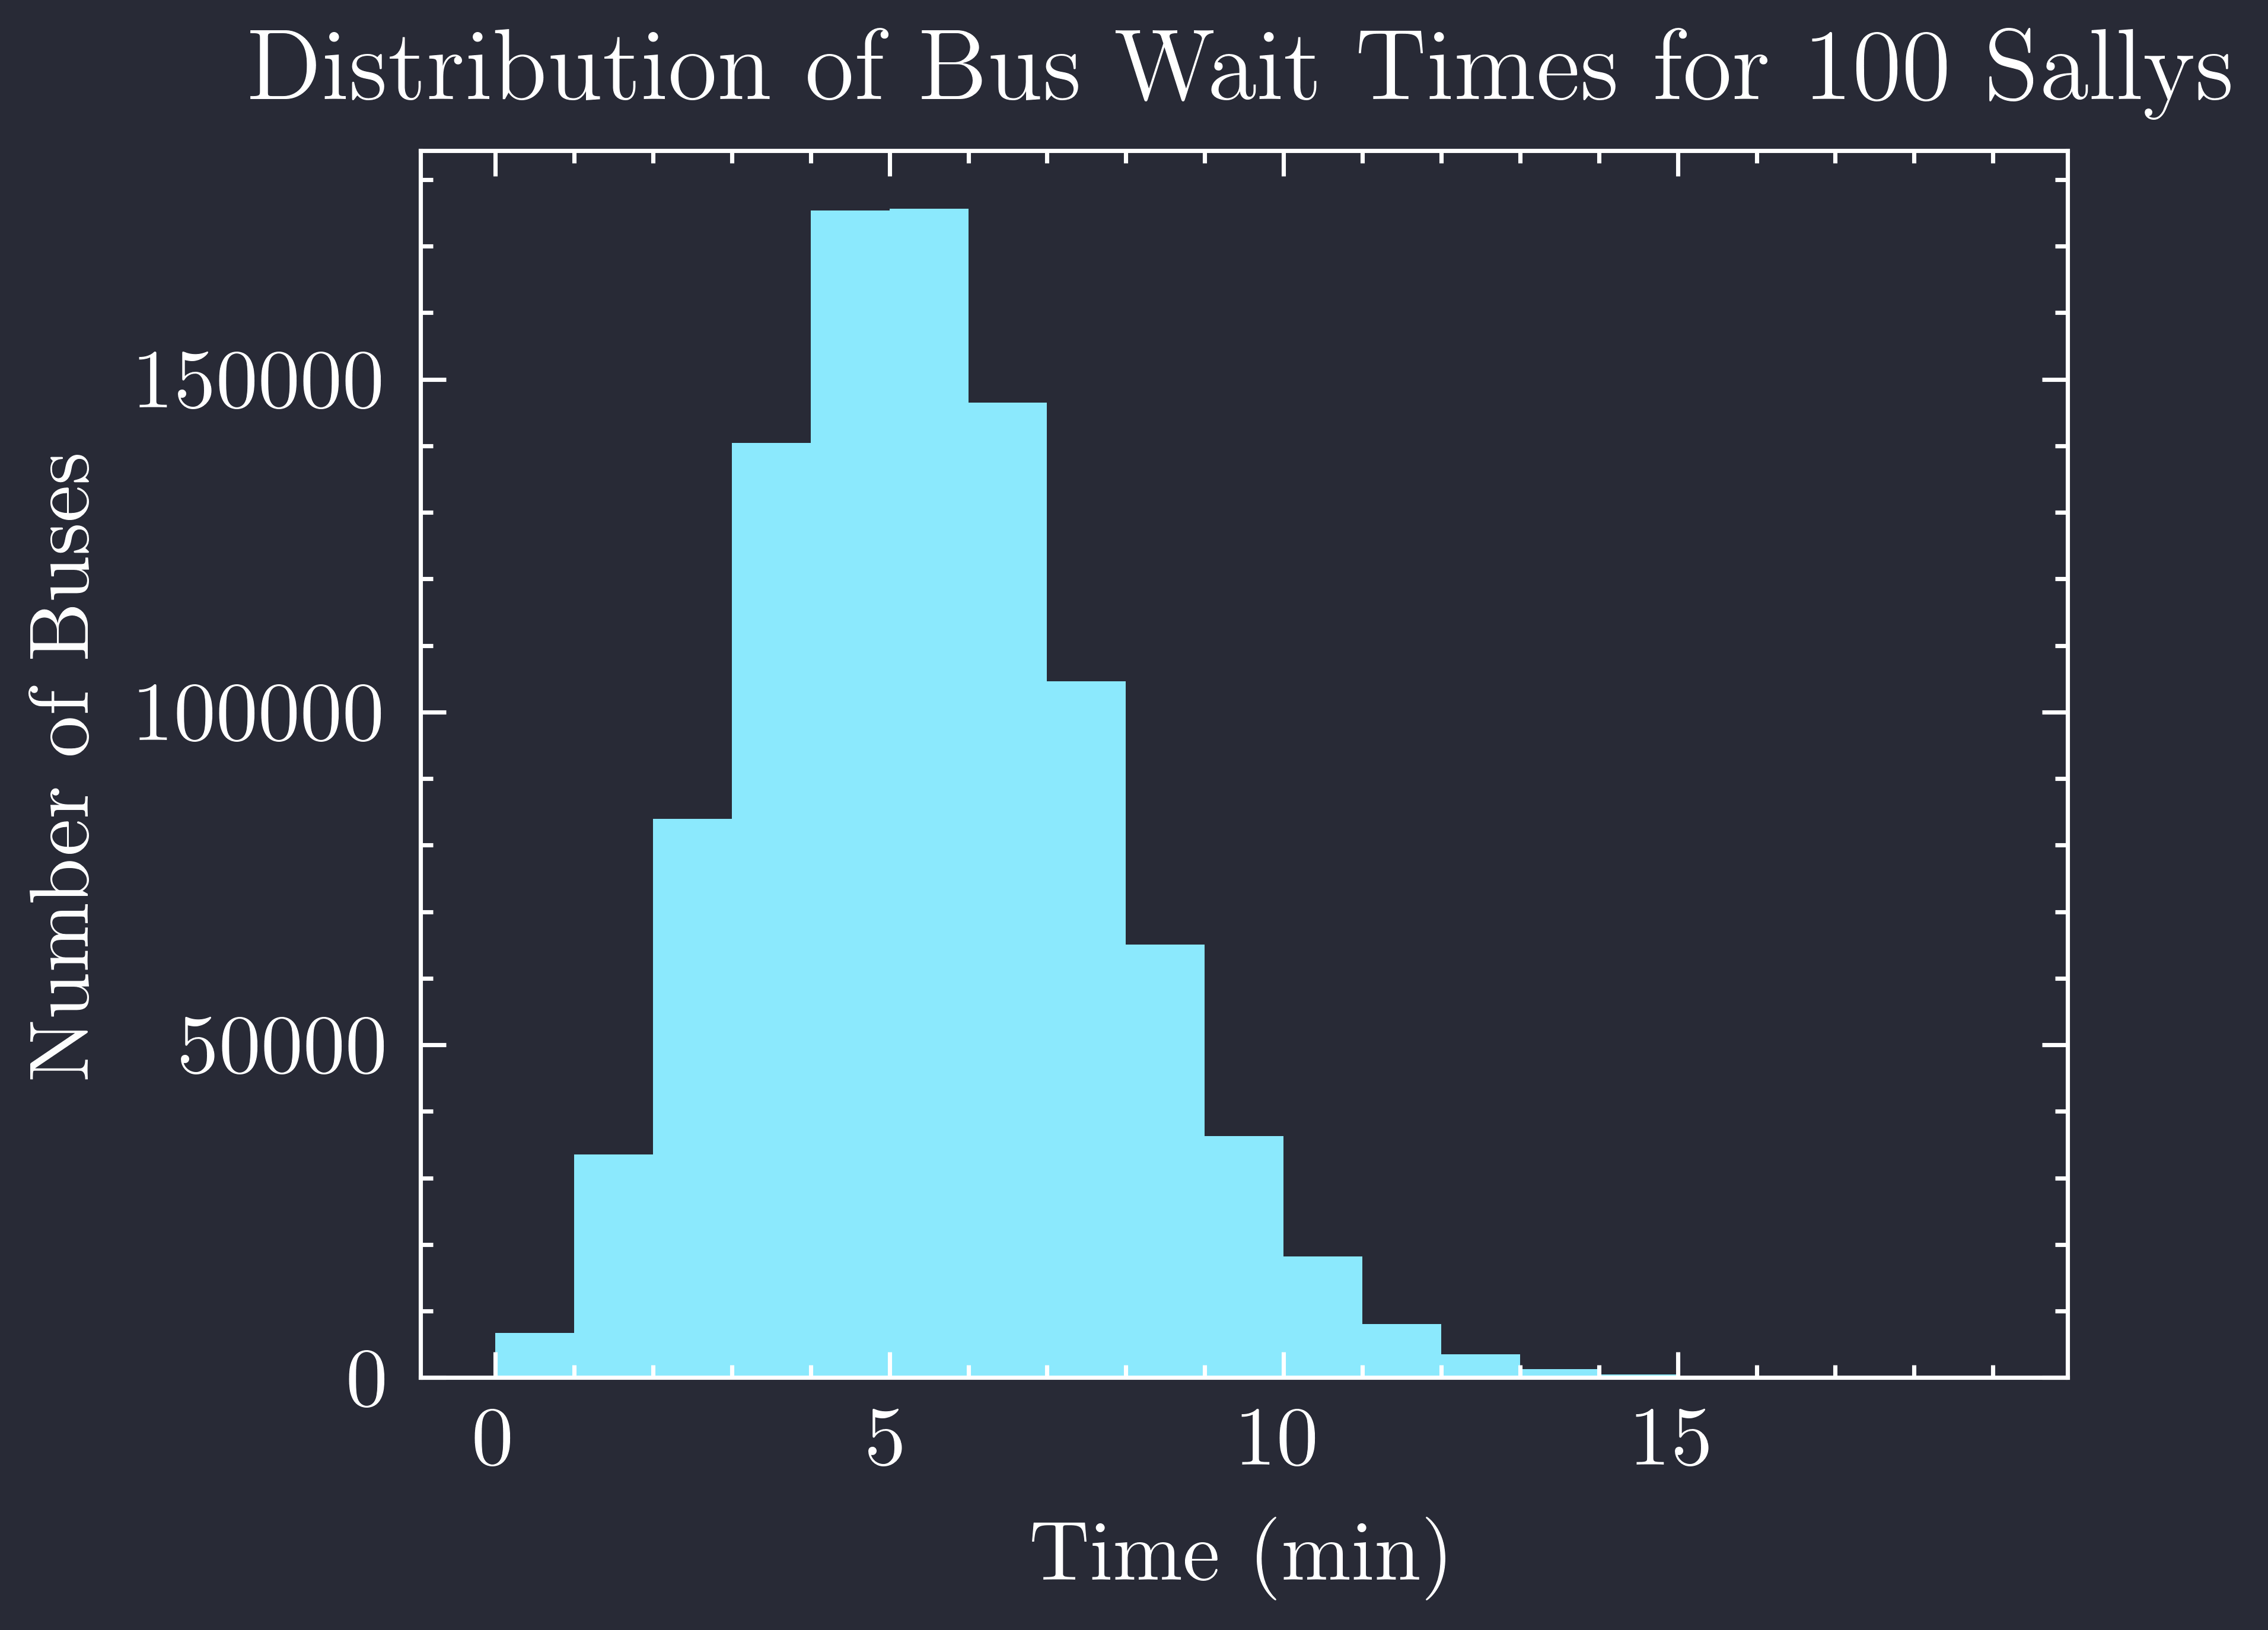

In [31]:
# implementing hard code
# random number generator
rand = np.random.default_rng(seed=42)

# Probability of 1 bus given 5 min avg
p = np.exp(-5)

# wait time for 1 bus
def wait_time():
    time = 0
    prod = 1.0
    while True:
        U = rand.random()
        prod *= U
        if prod > p:
            time += 1
        else:
            return time

def wait_time_100():
    times = []
    for i in range(100):
        times.append(wait_time())
    return times

# simulating 10000 buses
times = []
for i in range(10000):
    times += wait_time_100()

print(np.mean(times))

# plotting  
plt.figure()
plt.hist(times, bins=np.max(times))
plt.xlabel('Time (min)')
plt.ylabel('Number of Buses')
plt.title('Distribution of Bus Wait Times for 100 Sallys')
plt.show()

In [25]:
# time of bus that just passed
last_bus_times = []
for i in range(1, len(times)):
    if times[i] == 0:
        last_bus_times.append(times[i] - times[i - 1])

print(np.mean(last_bus_times))

# time in between buses
between_bus_times = []
for i in range(1, len(times)):
    between_bus_times.append(times[i] + times[i-1])

print(np.mean(between_bus_times))

-5.012881255552266
10.002945002945003
